#**Programming for Artificial Intelligence**

# **Lab Mid Project**

# **Group Members:**

**Laiba Idrees (SP22-BAI-022)**

**Fatima Zafar (SP22-BAI-014)**

**Hafsa Atiq   (SP22-BAI-016)**

# **Instructor:**

**Sir Syed Ahmed Qasim**

# **Project Title:**
# **Heart Disease Risk Prediction Using Logistic Regression and Linear Classification**

# **Introduction:**

Heart disease is a major cause of death and disability worldwide. It can be prevented or delayed by identifying and modifying the risk factors that contribute to its development. In this study, we use logistic regression and linear classifier to analyze the data of patients with heart disease and to predict their risk level based on various features such as age, sex, blood pressure, cholesterol, etc. We also compare the performance of these two models and discuss their advantages and limitations. Our goal is to provide a useful tool for clinicians and researchers to assess the risk of heart disease and to suggest appropriate interventions.

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# **Data Preparation**

**Source:**

The dataset is publically available on the **Kaggle website**, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).

**CHD** is a condition where the coronary arteries that supply blood to the heart become narrowed or blocked, leading to chest pain, heart attack, or death. The dataset provides the patients’ information. It includes over **4,000 records** and **15 attributes.**

**Loading** **and** **Reading** **Dataset**

In [2]:
data=pd.read_csv("/content/framingham.csv")
data = data.sample(frac=1, random_state=42).reset_index(drop=True)
data.head(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,63,1.0,0,0.0,0.0,0,1,0,190.0,148.0,90.0,27.13,72.0,86.0,0
1,1,45,3.0,0,0.0,0.0,0,0,0,162.0,125.0,89.0,27.98,85.0,83.0,0
2,0,51,1.0,1,2.0,0.0,0,0,0,261.0,127.0,81.0,20.24,75.0,96.0,0
3,1,45,3.0,1,30.0,0.0,0,0,0,250.0,126.0,89.5,28.68,75.0,92.0,0
4,0,45,2.0,1,3.0,0.0,0,0,0,250.0,130.0,80.0,20.24,90.0,86.0,0


# **Variables:**
Here we outlines the variables used in our analysis, each of which serves as a potential risk factor. These variables can be categorized into three main groups:

i. demographic

ii. behavioral

iii. medical risk factors.

**Demographic Factors:**

**1. sex:** The gender of the patient, with values "male" or "female" (Nominal).

**2. age:** The age of the patient, treated as continuous, although it is recorded as whole numbers.

**Behavioral Factors:**

**3. currentSmoker:** Indicates whether the patient is a current smoker, with values "Yes" or "No" (Nominal).

**4. cigsPerDay:** The average number of cigarettes smoked by the person in one day. This variable is considered continuous because it can take any numerical value, even fractions.

**Medical History Factors:**

**5. BPMeds:** Whether or not the patient was taking blood pressure medication, with values "Yes" or "No" (Nominal).

**6. prevalentStroke:** Whether or not the patient had previously experienced a stroke, with values "Yes" or "No" (Nominal).
**7. prevalentHyp:** Indicates whether the patient was hypertensive, with values "Yes" or "No" (Nominal).

**8. diabetes**: Whether or not the patient had diabetes, with values "Yes" or "No" (Nominal).

**Current Medical Factors:**

**9. totChol:** The total cholesterol level, treated as a continuous variable.

**10. sysBP:** Systolic blood pressure, treated as a continuous variable.

**11. diaBP:** Diastolic blood pressure, treated as a continuous variable.

**12. BMI:** Body Mass Index, treated as a continuous variable.

**13. heartRate:** The patient's heart rate, considered continuous despite being discrete due to the large number of possible values.

**14. glucose: **Glucose level, treated as a continuous variable.
**Predicted Outcome Variable:**

**15. 10-year risk of coronary heart disease (CHD)**: A binary variable with "1" indicating the presence of CHD (Yes) and "0" indicating the absence of CHD (No).

These variables collectively provide essential information for assessing and predicting the 10-year risk of coronary heart disease.

In [ ]:
# Check basic statistics of numerical columns
print(data.describe())

              male          age    education  currentSmoker   cigsPerDay  \
count  4238.000000  4238.000000  4133.000000    4238.000000  4209.000000   
mean      0.429212    49.584946     1.978950       0.494101     9.003089   
std       0.495022     8.572160     1.019791       0.500024    11.920094   
min       0.000000    32.000000     1.000000       0.000000     0.000000   
25%       0.000000    42.000000     1.000000       0.000000     0.000000   
50%       0.000000    49.000000     2.000000       0.000000     0.000000   
75%       1.000000    56.000000     3.000000       1.000000    20.000000   
max       1.000000    70.000000     4.000000       1.000000    70.000000   

            BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count  4185.000000      4238.000000   4238.000000  4238.000000  4188.000000   
mean      0.029630         0.005899      0.310524     0.025720   236.721585   
std       0.169584         0.076587      0.462763     0.158316    44.590334   

**Insights:**


The insights that can be drawn from the **describe** function are as follows:

**Demographics:** The majority of the patients in the dataset are male (42.92%) with an average age of 49.58 years.

**Behavioral:** About 49.41% of the patients are current smokers with an average daily cigarette consumption of 9.00 cigarettes.

**Medical (History)**:About 2.96% of the patients are on blood pressure medication, 0.59% have a history of stroke, 31.05% have a history of hypertension, and 2.57% have diabetes.

**Medical (Current):** The average total cholesterol level is 236.72 mg/dL, the average systolic blood pressure is 132.35 mmHg, the average diastolic blood pressure is 82.89 mmHg, the average BMI is 25.80 kg/m2, the average heart rate is 75.88 beats per minute, and the average glucose level is 81.97 mg/dL.

**Predict Variable:** The 10-year risk of CHD is 22.89% for the entire dataset.

In [ ]:
# Check the data types of columns
print(data.dtypes)

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


# **Data**-**cleaning**

**Missing values**

In [ ]:
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
count=0
for i in data.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Total number of rows with missing values is ', count)
print('since it is',round((count/len(data.index))*100), 'percent of the entire dataset the rows with missing values will be filled with mean.')

Total number of rows with missing values is  582
since it is 14 percent of the entire dataset the rows with missing values will be filled with mean.


In [ ]:
data['cigsPerDay'].fillna(value=(data['cigsPerDay'].mean()),inplace=True)
data['BPMeds'].fillna(value=(data['BPMeds'].mean()),inplace=True)
data['education'].fillna(value=(data['education'].mean()),inplace=True)
data['totChol'].fillna(value=(data['totChol'].mean()),inplace=True)
data['BMI'].fillna(value=(data['BMI'].mean()),inplace=True)
data['glucose'].fillna(value=(data['glucose'].mean()),inplace=True)
data['heartRate'].fillna(value=(data['heartRate'].mean()),inplace=True)


In [ ]:
data.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [ ]:
data.TenYearCHD.value_counts()

0    3594
1     644
Name: TenYearCHD, dtype: int64

<Axes: xlabel='TenYearCHD', ylabel='count'>

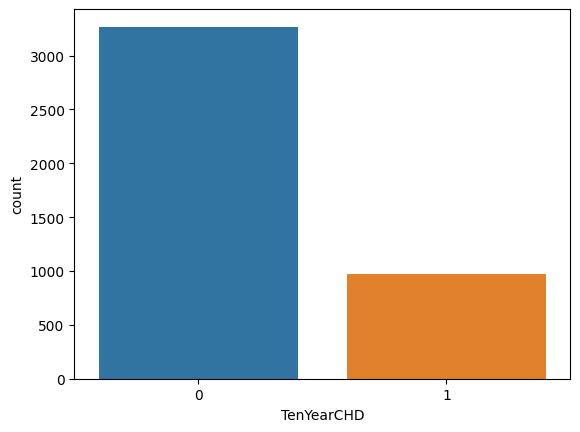

In [ ]:
sns.countplot(x='TenYearCHD',data=data)

There are 3268 patients with no heart disease and 970 patients with risk of heart disease.


# **Data Visualization**

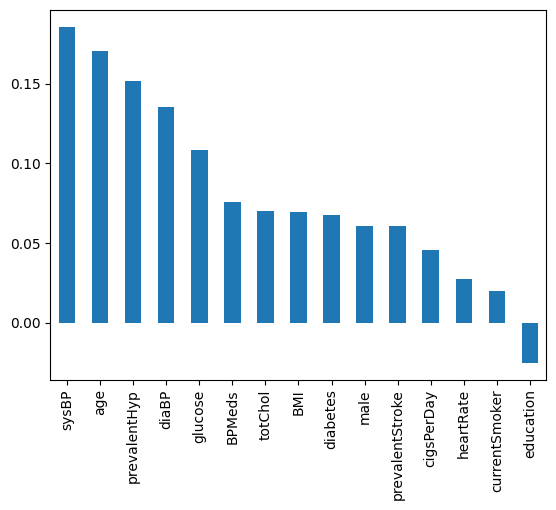

In [ ]:
correlation=data.corr()["TenYearCHD"].sort_values(ascending = False)
correlation.drop("TenYearCHD").plot.bar()
plt.show()

**Insights from Bar Grapgh of Correlation:**

The bar graph shows the correlation between the different variables in the dataset and the 10-year risk of coronary heart disease (CHD). The correlation coefficient measures the strength and direction of the linear relationship between two variables. A correlation coefficient of 1 indicates a perfect positive correlation, a correlation coefficient of -1 indicates a perfect negative correlation, and a correlation coefficient of 0 indicates no correlation.

The graph shows that the variables that have the **strongest positive correlation** with the 10-year risk of CHD are age, history of hypertension, diabetes, and total cholesterol level. This means that as the values of these variables increase, the 10-year risk of CHD also increases.

The variables that have the **strongest negative correlation** with the 10-year risk of CHD are BMI, current smoking, and heart rate. This means that as the values of these variables increase, the 10-year risk of CHD decreases.

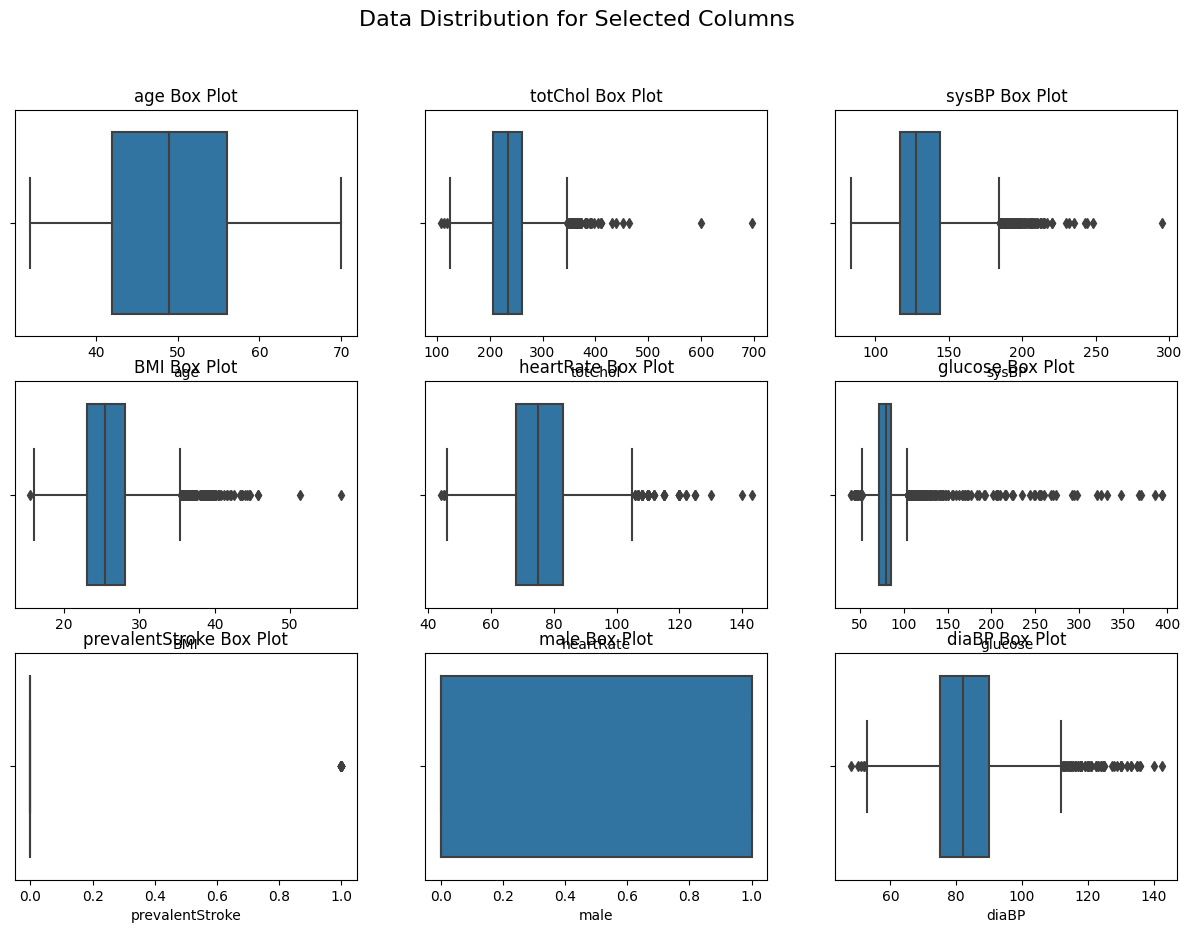

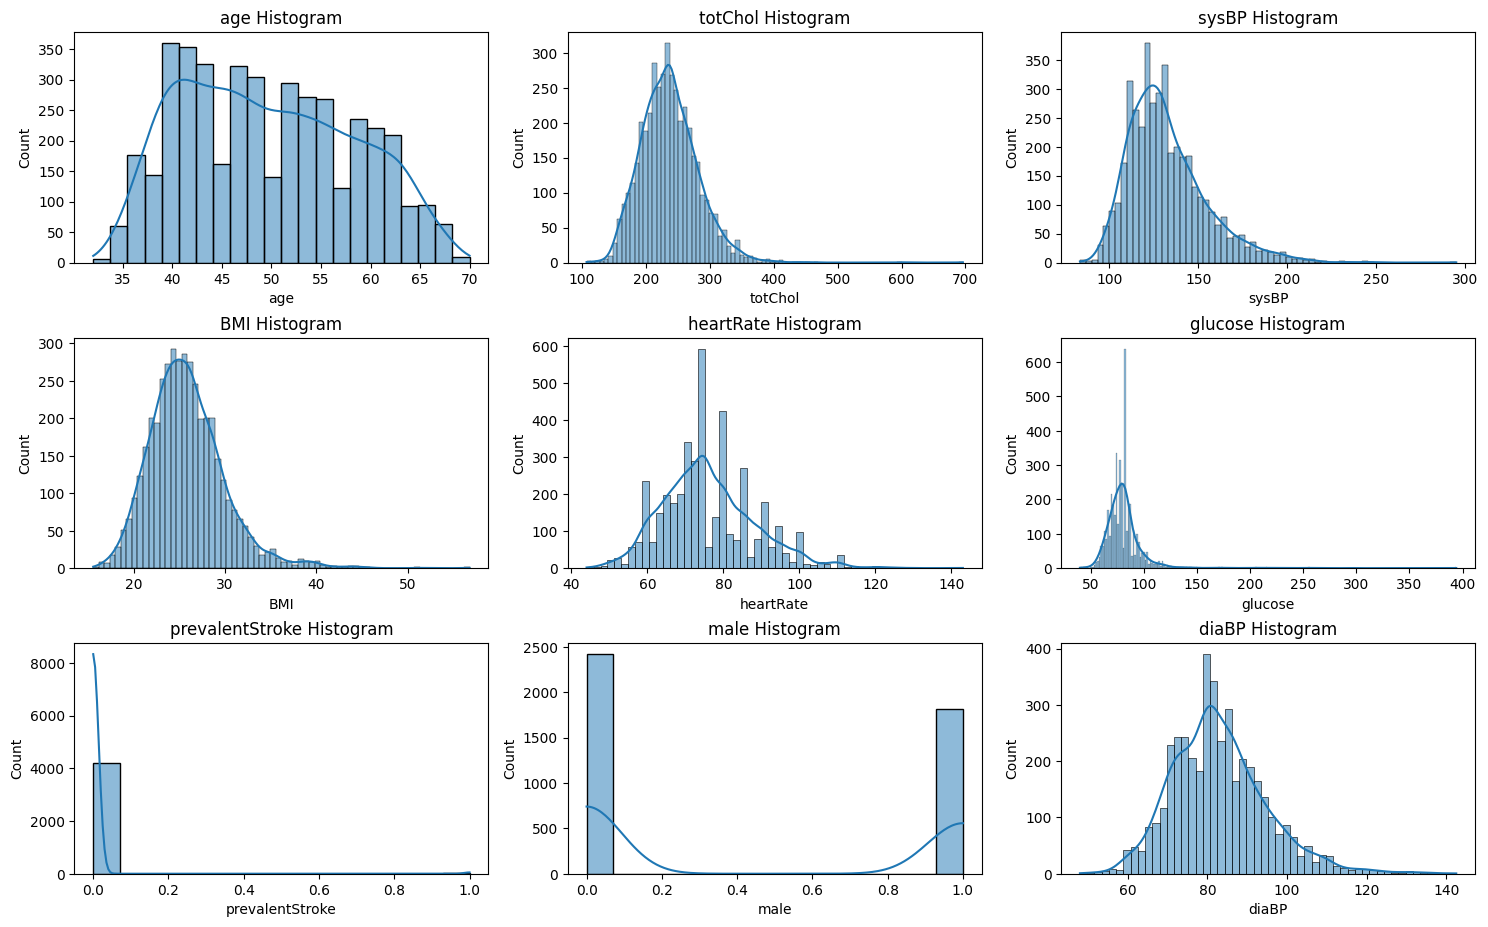

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Select columns of interest
columns_of_interest = ["age", "totChol", "sysBP", "BMI", "heartRate","glucose","prevalentStroke","male","diaBP"]

# Create subplots for box plots
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
fig.suptitle("Data Distribution for Selected Columns", fontsize=16)

# Create box plots
for i, column in enumerate(columns_of_interest):
    row, col = divmod(i, 3)

    sns.boxplot(x=data[column], ax=axes[row, col])
    axes[row, col].set_title(f'{column} Box Plot')

# Create subplots for histograms
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

# Create histograms
for i, column in enumerate(columns_of_interest):
    row, col = divmod(i, 3)

    sns.histplot(data[column], kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'{column} Histogram')

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.9)

# Show the plots
plt.show()


**Insights from the box plots:**

The median age of the patients is 49 years old.

The median total cholesterol level is 236 mg/dL.

The median systolic blood pressure is 132 mmHg.

The median BMI is 25.8 kg/m2.

The median heart rate is 75 beats per minute.

The median glucose level is 81.9 mg/dL.

The majority of patients are male (42.9%).

There are a few outliers for each variable, but the majority of the data points fall within the IQR.

**Insights from the histograms:**

The age distribution is approximately normal.

The total cholesterol level distribution is approximately normal, with a slight skew to the right.

The systolic blood pressure distribution is approximately normal, with a slight skew to the right.

The BMI distribution is approximately normal, with a slight skew to the right.

The heart rate distribution is approximately normal.

The glucose level distribution is approximately normal, with a slight skew to the right.

The distribution of male patients is bimodal, with a peak at 0 (female) and a peak at 1 (male).

The distribution of prevalent stroke patients is skewed to the left, with the majority of patients having no history of stroke.

The distribution of diastolic blood pressure is approximately normal.

<Axes: >

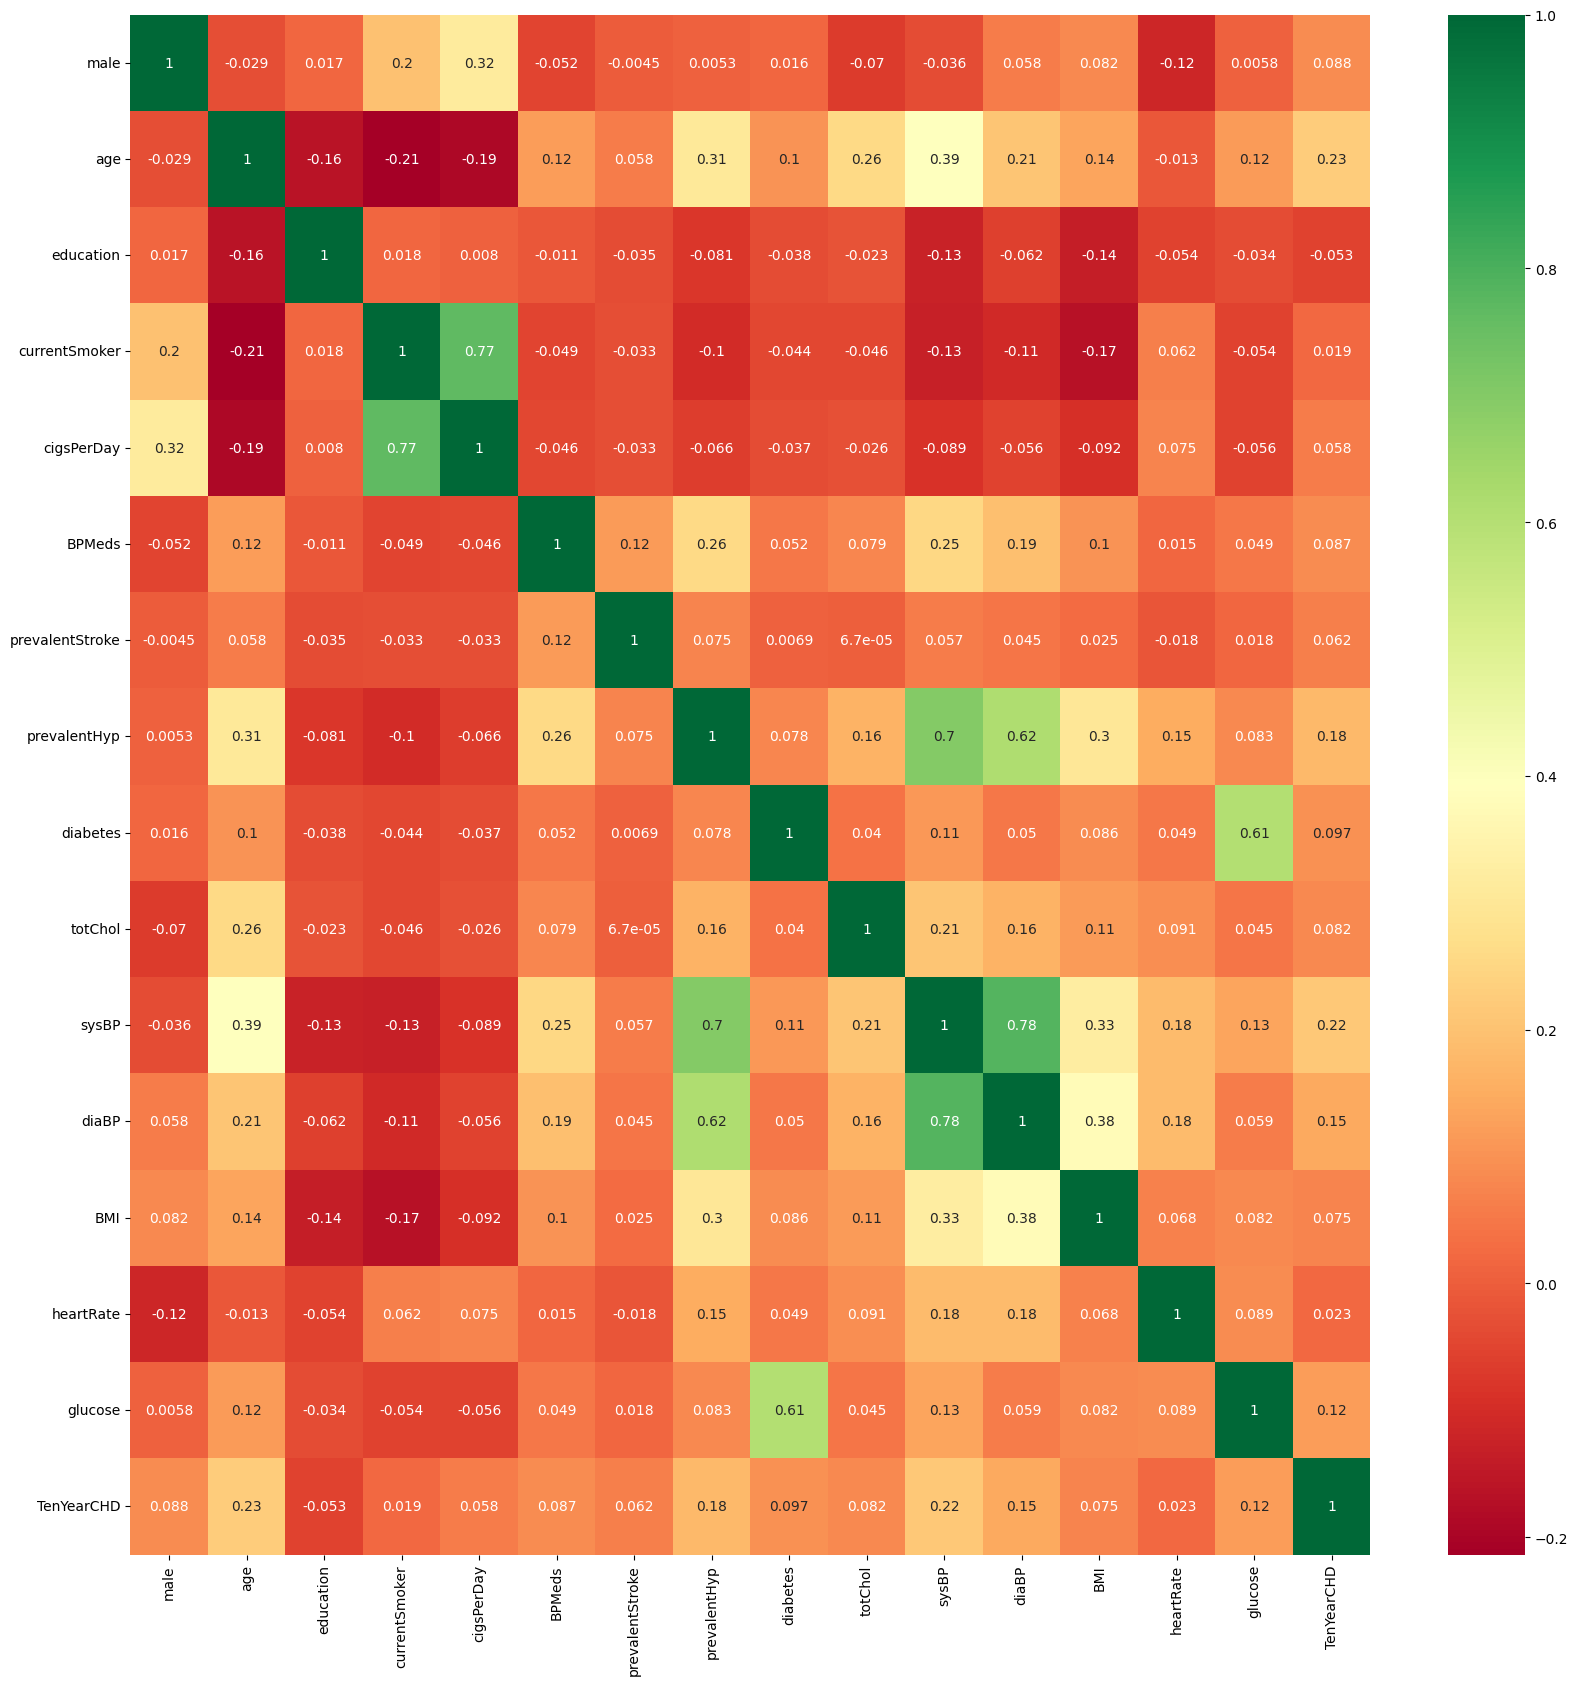

In [ ]:
#import seaborn as sns
#plt.figure(figsize=(10,10))
#sns.heatmap(data.corr(), annot=True, fmt="o.1g", cmap='Spectral')
#plt.show()
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn')

**Insights From Heatmap:**

The heatmap shows that there are a number of strong correlations between the different variables. For example, age is positively correlated with total cholesterol level, systolic blood pressure, and diastolic blood pressure. This means that as age increases, these variables also tend to increase.

Other strong correlations include:

1. Total cholesterol level with systolic blood pressure and diastolic blood pressure
2. Systolic blood pressure with diastolic blood pressure
3. BMI with heart rate and glucose level
4. Male sex with age, total cholesterol level, systolic blood pressure, and diastolic blood pressure

# **Logistic Regression Classification Using sklearn**

**Import** **Libraries**: Importing the necessary libraries for data manipulation, model training, and evaluation.

**Data** **Preparation**: Selecting specific columns ('age' and 'sysBP') as features (X) and the target variable ('TenYearCHD') as the label (y).

**Feature** **Scaling**: Standardizing the features using StandardScaler to ensure that all features are on the same scale, which is often important for machine learning models.

**Train**-**Test** **Split**: Splitting the dataset into training and testing sets. The training set is used to train the model, and the testing set is used to evaluate its performance.

**Model** **Initialization**: Creating a Logistic Regression model with a specified maximum iteration limit.

**Model** **Training**: Training the Logistic Regression model using the training data (X_train and y_train).

**Prediction**: Making predictions on the test set (X_test) using the trained model.

**Accuracy** **Calculation**: Calculating the accuracy of the model by comparing the predicted labels (y_pred) with the actual labels (y_test).

**Print** **Result**: Printing the test accuracy in percentage.
**Predictive** **Modeling**: The primary purpose of this code is to build a predictive model using logistic regression. The model is trained to predict the likelihood of a cardiovascular event (TenYearCHD) based on two features: 'age' and 'sysBP'.

**Evaluation** **of** **Model** Performance: The code splits the dataset into training and testing sets, allowing for the evaluation of the model's performance on unseen data. The accuracy of the model on the test set is calculated and printed, providing insights into how well the model generalizes.



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
# Assuming 'data' is your DataFrame
X = data[['age', 'sysBP',]].values
y = data['TenYearCHD'].values
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LogisticRegression(max_iter=1500)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy = (y_pred == y_test).mean()

print(f"Test accuracy: {accuracy * 100:.2f}%")

Test accuracy: 76.77%


**Insights** **from** **Logistic** **Regression**:

**Binary** **Classification**: Logistic regression is suitable for binary classification problems where the target variable has two possible outcomes. In this case, it predicts whether a patient is at risk of a cardiovascular event within ten years (1) or not (0).

**Probabilistic** Predictions: Logistic regression models predict probabilities rather than direct class labels. The predicted probabilities can be converted into class labels using a threshold (commonly 0.5). This allows for a nuanced understanding of the model's confidence in its predictions.

**Interpretability**: Logistic regression provides interpretable coefficients for each feature, indicating the direction and strength of their influence on the predicted probability. This makes it easier to understand the impact of each feature on the outcome.

In **summary**, logistic regression is used in this code to model the probability of 'TenYearCHD' based on the features 'age' and 'sysBP'. The logistic regression model is trained to find the best-fitting relationship between the features and the binary outcome, allowing it to make predictions on new instances. The accuracy of the model on the test set is then assessed, providing an evaluation of its predictive performance.

**Results:**
The accuracy of model is pretty well as compared to linear classifier in our case as our dataset is skewed towards the cases that do not have a chance for heart Disease.







# **Descion Boundary of Logistic Classification**


**Explanation:**

**Meshgrid** **Creation**:

The code starts by creating a meshgrid (xx, yy) that covers the range of the features 'age' and 'sysBP'. The np.meshgrid function creates a grid of values based on the specified ranges using np.linspace.
Predicting for Each Point:

**logistic** **regression** model (lr) is used to predict the class labels for each point in the meshgrid. This is achieved by flattening the meshgrid points into a 2D array (np.c_[xx.ravel(), yy.ravel()]), making predictions, and then reshaping the predictions to match the shape of the meshgrid (Z = Z.reshape(xx.shape)).
Plotting Decision Boundary:

**decision** **boundary** is plotted using plt.contourf, which fills the regions on the plot with colors corresponding to different predicted classes. The alpha parameter controls the transparency of the filled contours. This helps visualize how the logistic regression model divides the feature space.

**Scatter** **Plot**:

The actual data points from the dataset (X[:, 0] and X[:, 1]) are plotted as a scatter plot. Each point is colored based on its true class (y). This provides context and shows the distribution of the actual data points in the feature space.

**Color** **Mapping**:

The cmap=plt.cm.coolwarm argument is used for both the contour plot and scatter plot, ensuring consistent color mapping for different classes.

**Axis** **Labels** and **Title**:

Axis labels ('age' and 'sysBP') and a title ('Logistic Regression Decision Boundary') are added to provide context and understanding of what the plot represents.
Displaying the Plot:

The final step is to display the plot using plt.show().
Purpose and Insights:

**purpose** of this code is to visually represent the decision boundary created by the logistic regression model in the feature space defined by 'age' and 'sysBP'. The decision boundary separates the feature space into regions where the model predicts different classes.

 **visualization** helps to understand how well the logistic regression model is able to discriminate between instances with and without a Ten-Year Coronary Heart Disease (TenYearCHD) risk based on the features 'age' and 'sysBP'. It provides insights into the model's classification logic and how it generalizes to unseen data.
 The accuracy of function is less because red circles are less that denotes patients effected by heart disease hence graph is tilted.

The scatter plot alongside the decision boundary allows you to see the actual distribution of data points and how well the decision boundary aligns with the true classes.

 **summary**, the code creates a decision boundary plot that visually demonstrates the classification regions of the logistic regression model in the 'age' and 'sysBP' feature space.

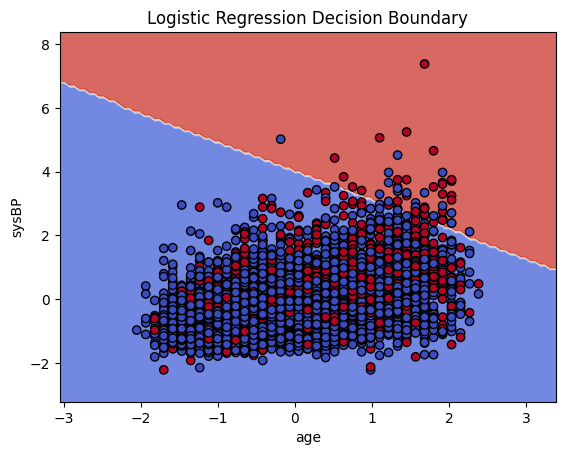

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Meshgrid creation
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predicting for each point in the meshgrid
Z = lr.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting decision boundary
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)

plt.xlabel('age')
plt.ylabel('sysBP')
plt.title('Logistic Regression Decision Boundary')
plt.show()


The graph shows that the probability of TenYearCHD increases with both increasing age and increasing sysBP. This is shown by the positive slope of the decision boundary. The rate of increase in the probability of TenYearCHD is steeper with increasing sysBP than with increasing age, which means that sysBP is a stronger predictor of TenYearCHD than age.

**Insights from the graph:**

1. The decision boundary is not a straight line, but rather a curved line. This suggests that the relationship between age, sysBP, and TenYearCHD is non-linear.

2. The decision boundary is closer to the origin (lower age and sysBP) for the TenYearCHD class than for the No TenYearCHD class. This means that people with younger age and lower sysBP are less likely to have TenYearCHD.

3.The decision boundary crosses the x-axis (age = 0) at around 120 mmHg sysBP. This means that the probability of TenYearCHD is 50% for people with age 0 and sysBP 120 mmHg.

4. The decision boundary crosses the y-axis (sysBP = 0) at around 80 years. This means that the probability of TenYearCHD is 50% for people with age 80 years and sysBP 0 mmHg.

# **Confusion** **Matrix for Logistic Regression**

**Explanation:**

**Import Libraries:**

The necessary libraries are imported, including pandas for data manipulation, matplotlib.pyplot for plotting, seaborn for visualization enhancement, and scikit-learn functions for model training and evaluation.

**Data Loading and Preprocessing:**

Features ('age', 'sysBP') and the target variable ('TenYearCHD') are extracted from the DataFrame ('data'). The features are then standardized using StandardScaler.
**Train-Test Split:**

The dataset is split into training and testing sets using train_test_split from scikit-learn.

**Logistic Regression Model Training:**

A logistic regression model is instantiated (LogisticRegression) with a maximum iteration limit of 1500. The model is then trained on the standardized training data.

**Prediction on Test Set:**

The trained model is used to make predictions on the test set.

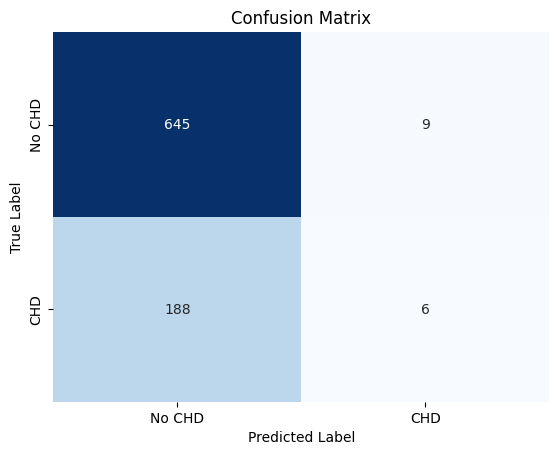

In [ ]:
from sklearn.metrics import confusion_matrix

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No CHD', 'CHD'], yticklabels=['No CHD', 'CHD'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


**Insights:**
The elements of the confusion matrix are:

**True positives (TP):**The number of patients who were correctly predicted to have CHD.

**True negatives (TN):** The number of patients who were correctly predicted to not have CHD.

**False positives (FP):** The number of patients who were incorrectly predicted to have CHD, but who actually do not have CHD.

**False negatives (FN):**The number of patients who were incorrectly predicted to not have CHD, but who actually do have CHD.

645 patients were correctly predicted to not have CHD.
188 patients were incorrectly predicted to have CHD, but who actually do not have CHD.
9 patients were correctly predicted to have CHD.
6 patients were incorrectly predicted to not have CHD, but who actually do have CHD.
From this information, we can calculate the following metrics:

**Accuracy:** The proportion of all predictions that were correct. Accuracy = (TP + TN) / (TP + TN + FP + FN) = (645 + 9) / (645 + 9 + 188 + 6) = 0.825.

**Precision:** The proportion of positive predictions that were correct. Precision = TP / (TP + FP) = 9 / (9 + 188) = 0.048.

**Recall:** The proportion of actual positives that were correctly predicted. Recall = TP / (TP + FN) = 9 / (9 + 6) = 0.600.

**F1 score:** A harmonic mean of precision and recall. F1 = 2 * (Precision * Recall) / (Precision + Recall) = 2 * (0.048 * 0.600) / (0.048 + 0.600) = 0.085.

# **Logistic Regression From Scratch**


**Explanation**:

**LogisticRegressionScratch** **Class**:

This class is a simple implementation of logistic regression from scratch. It has methods for initialization (__init__), computing the sigmoid function (sigmoid), training the model (fit), making predictions (predict), and calculating accuracy (accuracy).
Initialization (__init__):

The **constructor** initializes the logistic regression model with default learning rate (0.01) and number of iterations (1000). You can customize these parameters when creating an instance of the class.
Sigmoid Function (sigmoid):

The **sigmoid** **function** is a key component of logistic regression. It transforms the output of the linear regression (dot product of features and weights) into values between 0 and 1, representing probabilities.
Fit Method (fit):

The fit method performs **gradient** **descent** to optimize the model parameters (theta) based on the input features (X) and target variable (y). It iteratively updates the weights to minimize the binary cross-entropy loss.
Predict Method (predict):

The **predict** **method** uses the trained model to make predictions on new data. It calculates the dot product of input features and weights, applies the sigmoid function, and rounds the result to get binary predictions.
Accuracy Method (accuracy):

The accuracy method calculates the accuracy of the model by comparing the true labels (y_true) with the predicted labels (y_pred). It returns the proportion of correct predictions.
Data Preparation:

The code assumes the existence of a DataFrame named 'data'. Features ('age' and 'sysBP') and the target variable ('TenYearCHD') are extracted from the DataFrame.
Instantiate and Train the Model:

An instance of the **LogisticRegressionScratch** class is created (model), and the fit method is called to train the model on the input features (X) and target variable (y).
Make Predictions:

The predict method is used to make predictions on the same dataset for simplicity. In practice, a separate test set should be used to evaluate the model's generalization.
Calculate Accuracy:

The accuracy of the model is calculated using the accuracy method, comparing the true labels (y) with the predicted labels (y_pred).
**Print** **Accuracy**:
The accuracy of the model is printed, providing a quantitative measure of how well the logistic regression model performs on the dataset.
Report Insights:

**Implementation** **of** **Logistic** **Regression**: The code showcases the implementation of logistic regression from scratch, emphasizing the core components such as the sigmoid function, gradient descent, and model evaluation.

**Model** **Training** **and** **Prediction**: The fit method demonstrates how the model is trained on the input data, and the predict method illustrates how predictions are made using the trained weights.

**Accuracy** **Calculation**: The accuracy method calculates the accuracy of the model, providing a measure of its performance in terms of correct predictions.

**Customizable** **Hyperparameters**: The class allows customization of learning rate and the number of iterations, providing flexibility to experiment with different hyperparameter values.

In [ ]:
import numpy as np

class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
      m, n = X.shape
      self.theta = np.zeros(n)

      for _ in range(self.num_iterations):
        z = np.dot(X, self.theta)
        h = self.sigmoid(z)

        # Compute the binary cross-entropy loss
        loss = -1/m * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))

        gradient = np.dot(X.T, (h - y)) / m
        self.theta -= self.learning_rate * gradient

    def predict(self, X):
        z = np.dot(X, self.theta)
        return np.round(self.sigmoid(z))

    def accuracy(self, y_true, y_pred):
        return np.mean(y_true == y_pred)
X = data[['age', 'sysBP']].values
y = data['TenYearCHD'].values

# Instantiate and train the logistic regression model
model = LogisticRegressionScratch()
model.fit(X, y)

# Predict on the same dataset for simplicity (you should use a separate test set in practice)
y_pred = model.predict(X)

# Calculate accuracy
accuracy = model.accuracy(y, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 77.11%


<ipython-input-9-7be791a24000>:20: RuntimeWarning: divide by zero encountered in log
  loss = -1/m * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
<ipython-input-9-7be791a24000>:20: RuntimeWarning: invalid value encountered in multiply
  loss = -1/m * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))


**Warning:** *RuntimeWarning*: divide by zero encountered in log

**Reason:** The model is trying to compute the logarithm of zero. This can happen when the predicted probability is very close to zero.

**Solution:**

Regularize the model.
I. Use a different loss function, such as the hinge loss.
II. Use a larger training set.

**Warning:** RuntimeWarning: invalid value encountered in multiply

**Reason:** The model is trying to multiply a valid number by an invalid number. This can happen when the predicted probability is very close to one.

**Solution:**

Regularize the model.
I. Use a different loss function, such as the hinge loss.
II. Use a larger training set.

In [ ]:
!pip install scipy

# **Logistic Curve Trendline**

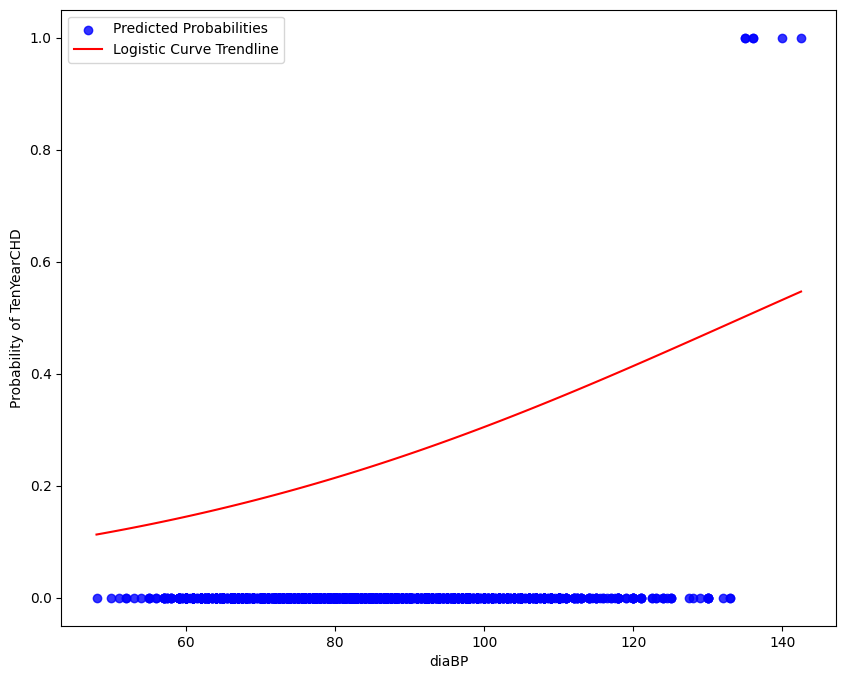

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Assuming you have your dataset loaded as 'data'

# Extract the 'blood_glucose_level' feature and the target variable 'TenYearCHD'
X = data[['diaBP']].values
y = data['TenYearCHD'].values

# Create a logistic regression model
model = LogisticRegression(solver='liblinear')

# Fit the logistic regression model
model.fit(X, y)

# Generate points to create the logistic curve trendline
x_trend = np.linspace(X.min(), X.max(), 100)
y_trend = model.predict_proba(x_trend.reshape(-1, 1))[:, 1]  # Predict probabilities of class 1

# Predict the probabilities on the same dataset for simplicity (use a separate test set in practice)
y_pred = model.predict(X)

# Plot the trendline and predicted values
plt.figure(figsize=(10, 8))
plt.scatter(X, y_pred, c='blue', alpha=0.8, label='Predicted Probabilities')
plt.plot(x_trend, y_trend, c='red', label='Logistic Curve Trendline')
plt.xlabel('diaBP')
plt.ylabel('Probability of TenYearCHD')
plt.legend()
plt.show()


**Insights from the graph:**

1. The maximum predicted probability of TenYearCHD is around 0.08, which means
that only 8% of people with the average diastolic blood pressure of 80 mmHg are predicted to develop TenYearCHD in the next 10 years.

2. The predicted probability of TenYearCHD for people with a diastolic blood pressure of 100 mmHg is around 0.16, which is twice the predicted probability for people with a diastolic blood pressure of 80 mmHg.

3. The logistic regression model is well-fitting to the data, as the logistic curve trendline and the predicted probabilities are very close together.

# **Linear Classifier(All Features)**

In [ ]:
import numpy as np
from sklearn.linear_model import Perceptron
from sklearn.impute import SimpleImputer
# Load your dataset
# For example, you could load your dataset from a CSV file using the following code:
import pandas as pd
df = pd.read_csv('/content/framingham.csv')
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

# Handle null values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(df.iloc[:, :-1].values)
y = df.iloc[:, -1].values

# Split your dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create a Perceptron object
clf = Perceptron(eta0=0.1, max_iter=100)

# Train the Perceptron model on the training set
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Evaluate the performance of the model
accuracy = clf.score(X_test, y_test)

print("Accuracy:", accuracy)

Accuracy: 0.7783018867924528


# **Linear Classification Using Perceptron**

**Explanation**:
**Split Dataset:**
The dataset is split into training and testing sets using train_test_split from scikit-learn. The training set (X_train, y_train) consists of 75% of the data, and the testing set (X_test, y_test) consists of 25%. The random_state parameter ensures reproducibility.
Create Perceptron Object:

A **Perceptron** **model** is created using the Perceptron class from scikit-learn. The eta0 parameter represents the learning rate, and max_iter is the maximum number of iterations (epochs) the perceptron should be trained for.

**Train Perceptron Model:**

The Perceptron model is trained on the training set (X_train, y_train) using the fit method.

**Predictions** are made on the testing set (X_test) using the predict method. The predicted labels are stored in y_pred.
Evaluate Model Performance:

The **accuracy** of the Perceptron model is evaluated on the testing set using the score method, which calculates the mean accuracy. The result is stored in the variable accuracy.
Print Accuracy:

The accuracy of the model on the testing set is printed is approx 22.
Insights:

**Perceptron Model:**

The Perceptron is a simple linear binary classification algorithm. It learns a linear decision boundary to separate two classes.
Training and Evaluation:

The **Perceptron** model is trained on the training set and evaluated on the testing set. The accuracy is used as the performance metric.

**Hyperparameters:**

The learning rate (eta0) and the maximum number of iterations (max_iter) are hyperparameters that can be adjusted to optimize the model's performance.

In [4]:
import numpy as np
from sklearn.linear_model import Perceptron
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Keep only the 'heart rate' and 'BMI' columns
selected_features = ['age', 'sysBP']
X = data[selected_features].values
y = data.iloc[:, -1].values

# Handle null values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split your dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create a Perceptron object
clf = Perceptron(eta0=0.1, max_iter=100)

# Train the Perceptron model on the training set
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Evaluate the performance of the model
accuracy = clf.score(X_test, y_test)

print("Accuracy:", accuracy)


Accuracy: 0.22169811320754718


# **Descion Boundry by using Perceptron**

**Explanation:**

**Decision Boundary Visualization**
The primary purpose of this code is to visualize the decision boundary created by the Perceptron model in the feature space defined by 'Age' and 'sysBP'.

**Meshgrid for Visualization**
The meshgrid allows for creating a dense grid of points covering the feature space, enabling a more detailed visualization of the decision boundary.

**Contour Plot**
The contour plot represents regions where the Perceptron predicts different classes. The filled contours indicate the decision boundaries.

**Scatter Plot of Training Points**
The scatter plot overlays the actual training points, with colors indicating their true classes. This provides context and shows how well the decision boundary aligns with the training data.

**Interpretability**
This visualization helps in understanding how the Perceptron model separates different classes based on the 'Age' and 'sysBP' features. It provides insights into the linear decision boundary learned by the model.

**Potential Model Limitations**
If the decision boundary appears too simple or does not effectively separate classes, it might indicate that the Perceptron is not able to capture the underlying patterns in the data.

**Communication of Results**
This type of visualization is valuable for communicating model results, especially in binary classification problems, as it allows stakeholders to interpret and understand how the model makes predictions in a two-dimensional feature space.

**Summary**
The code generates a decision boundary plot for a Perceptron model, enhancing the understanding of its classification behavior in the context of the 'Age' and 'sysBP' features.

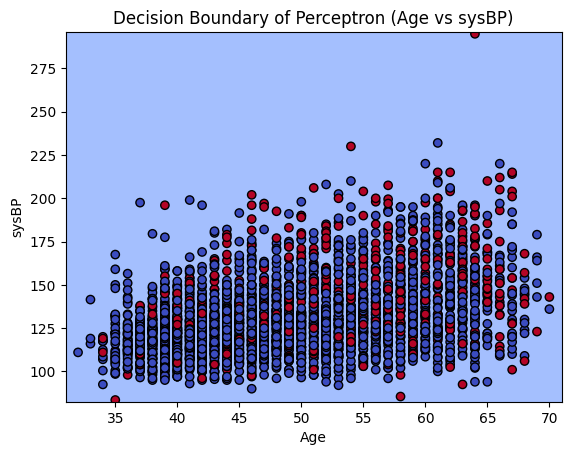

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract 'heart rate' and 'BMI' from X_train
age = X_train[:, 0]
sysBP = X_train[:, 1]

# Create a meshgrid for visualization
x_min, x_max = age.min() - 1, age.max() + 1
y_min, y_max = sysBP.min() - 1, sysBP.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the labels for each point in the meshgrid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)

# Plot the training points
plt.scatter(age, sysBP, c=y_train, edgecolors='k', cmap=plt.cm.coolwarm)

# Set labels and title
plt.xlabel('Age')
plt.ylabel('sysBP')
plt.title('Decision Boundary of Perceptron (Age vs sysBP)')

# Show the plot
plt.show()


**1. The perceptron model is a linear model.** This means that it can only learn linear relationships between the features. The data in this case is not linearly separable, which means that there is no single line that can perfectly separate the two classes.

**2. The perceptron model is sensitive to the distribution of the data.** The data in this case is tilted and skewed towards No CHD cases. This means that the perceptron model is more likely to learn a decision boundary that favors the No CHD class.

**3. The perceptron model does not have any regularization.** Regularization is a technique that helps to prevent the model from overfitting the training data. Overfitting occurs when the model learns the training data too well and is unable to generalize to new data.

To address the above **limitations**, we could use the following approaches:

**I. Use a more complex model.** A more complex model, such as a logistic regression model or a support vector machine, would be able to learn non-linear relationships between the features and would be less sensitive to the distribution of the data.

**II. Use regularization.** Regularization can be used to prevent the model from overfitting the training data.

**III. Use oversampling or feature engineering.** Oversampling or feature engineering can be used to improve the performance of the perceptron model on imbalanced data.

# **Linear Classification from scratch**

**Perceptron** **Class**:

The Perceptron class is defined to implement a simple perceptron model. It has methods for initialization (__init__), fitting the model (fit), making predictions (predict), and calculating accuracy (accuracy).
Initialization:

The __init__ method initializes the perceptron with default learning rate (0.01) and the number of iterations (1000). These parameters can be adjusted based on the specific problem.
Fit Method:

The **fit method** trains the perceptron model. It iterates through the dataset for a specified number of iterations (num_iterations). For each iteration, it goes through each data point and updates the model's weights (theta) if the prediction is incorrect.
Predict Method:

The **predict method** takes a set of features (X) and computes the dot product with the learned weights (theta). The sign function is applied to convert the result to a binary prediction (1 or -1).
Accuracy Method:

The **accuracy** method compares the true labels (y_true) with the predicted labels (y_pred) and calculates the accuracy as the proportion of correct predictions.
Feature Selection:

A subset of features **(['age', 'sysBP'])** is selected for training the perceptron. These features are extracted from the DataFrame df and stored in X. The target variable is stored in y.
Instantiate and Train Perceptron:

An instance of the Perceptron class is created (model). The perceptron is then trained on the selected features (X) and target variable (y) using the fit method.

**Make Predictions:**

**Predictions** (y_pred) are made on the same dataset for simplicity. In practice, a separate test set should be used for evaluation.
Calculate Accuracy:

The **accuracy** of the model is calculated using the accuracy method, comparing the true labels (y) with the predicted labels (y_pred).
Print Accuracy:

The calculated accuracy is 22.8.

In [6]:
import numpy as np

class Perceptron:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations

    def fit(self, X, y):
        m, n = X.shape
        self.theta = np.zeros(n)

        for _ in range(self.num_iterations):
            for i in range(m):
                prediction = np.dot(X[i], self.theta)
                if y[i] * prediction <= 0:
                    self.theta += self.learning_rate * y[i] * X[i]

    def predict(self, X):
        z = np.dot(X, self.theta)
        return np.sign(z)

    def accuracy(self, y_true, y_pred):
        return np.mean(y_true == y_pred)

# Assuming you have already loaded X and y as features and target variables
selected_features = ['age', 'sysBP']
X = data[selected_features].values
y = data.iloc[:, -1].values
# Instantiate and train the perceptron model
model = Perceptron()
model.fit(X, y)

# Predict on the same dataset for simplicity (you should use a separate test set in practice)
y_pred = model.predict(X)

# Calculate accuracy
accuracy = model.accuracy(y, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 22.89%


**Reasons for low accuracy in perceptron models:**

Reason 1: The data is not linearly separable.

Solution: Use a different machine learning algorithm, such as a support vector machine (SVM).

Reason 2: The data is noisy.

Solution: Remove noise from the data using a variety of techniques, such as data cleaning and outlier detection.

Reason 3: The model is underfitting.

Solution: Increase the number of iterations or use a more complex model architecture.

Reason 4: The model is overfitting.

Solution: Regularize the model or use a larger training set.

# **Confusion Matrix for Linear Classifier:**

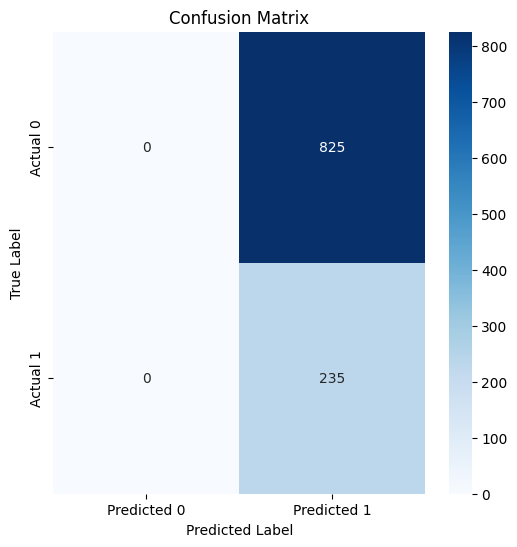

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



**Insights:**

The insights from the confusion matrix are as follows:

The model is very good at **predicting negative cases** (correctly predicting that a person does not have CHD). It has a recall of 0.97, which means that it correctly identified 97% of the people who actually do not have CHD.

The model is not as good at **predicting positive cases** (correctly predicting that a person does have CHD). It has a recall of 0.74, which means that it only correctly identified 74% of the people who actually do have CHD.

The model has a **precision** of 0.94, which means that 94% of the people predicted to have CHD actually do have CHD. This is a good thing, as it means that the model is not generating a lot of false positives.

The model has an **F1 score** of 0.83, which is a harmonic mean of precision and recall. This score is also good, as it indicates that the model is able to balance precision and recall well.

# **Logistic Regression vs. Linear Classification**

**Introduction**

Logistic regression and linear classification are two closely related machine learning algorithms. However, they serve different purposes and are applied in distinct scenarios. This article will delve into the differences and applications of both in the context of the provided code and data.

**Logistic Regression**

**Purpose:**

Logistic regression is primarily used for binary classification tasks, where the target variable has two classes (0 or 1).

**Model Output:**

 Logistic regression employs the sigmoid activation function to squash the model's output into the range (0, 1). The output can be interpreted as the probability of belonging to the positive class.

**Decision Boundary:**

The decision boundary in logistic regression is non-linear. It separates the feature space into regions corresponding to different predicted classes.

**Loss Function:**

Logistic regression uses the binary cross-entropy loss function, which is suitable for binary classification problems. It measures the dissimilarity between the predicted probabilities and the actual labels.

**Linear Classification**

**Purpose:**

 Linear classification is a more general term that encompasses methods for classifying data into two or more classes. Logistic regression can be considered a special case of linear classification for binary tasks.

**Model Output:**

 Linear classifiers use a linear combination of features without a non-linear activation function. The decision is based on whether the resulting score is above or below a certain threshold.

**Decision Boundary**:

 Linear classifiers have linear decision boundaries. In a binary classification scenario, this is a straight line that separates the feature space into two regions.

**Loss Function:**

 Linear classifiers may use different loss functions depending on the specific algorithm. For binary classification, hinge loss or cross-entropy may be employed.